In [54]:
import os
import cv2
import matplotlib.pyplot as plt

## Object Detection using Open CV !

### This project is part of the Sparkle Foundations internship, huge thanks to them!

In [2]:
weights = 'yolov4-tiny.weights'
config = 'yolov4-tiny.cfg'
net = cv2.dnn.readNet(weights, config)
model = cv2.dnn_DetectionModel(net)
# you pick the size depending on the tradeoff between the detection and speed
model.setInputParams(size=(320, 320), scale=1/255)

In [3]:
classes = []
with open('classes.txt', 'r') as f:
    for line in f.readlines():
        classes.append(line.strip())

In [23]:
def detect_one_img(img):
    (class_ids, scores, bboxes) = model.detect(img)
    indices = cv2.dnn.NMSBoxes(bboxes, scores, 0.3, 0.5)
    for index in indices:
        class_id = class_ids[index]
        (x, y, w, h) = bboxes[index]
        # writing the class label above the frame
        class_name = classes[class_id]
        cv2.putText(img, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 150), 2)
        # drawing a rectangle around the frame
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 150), 3)

### Now lets try out the model on an image

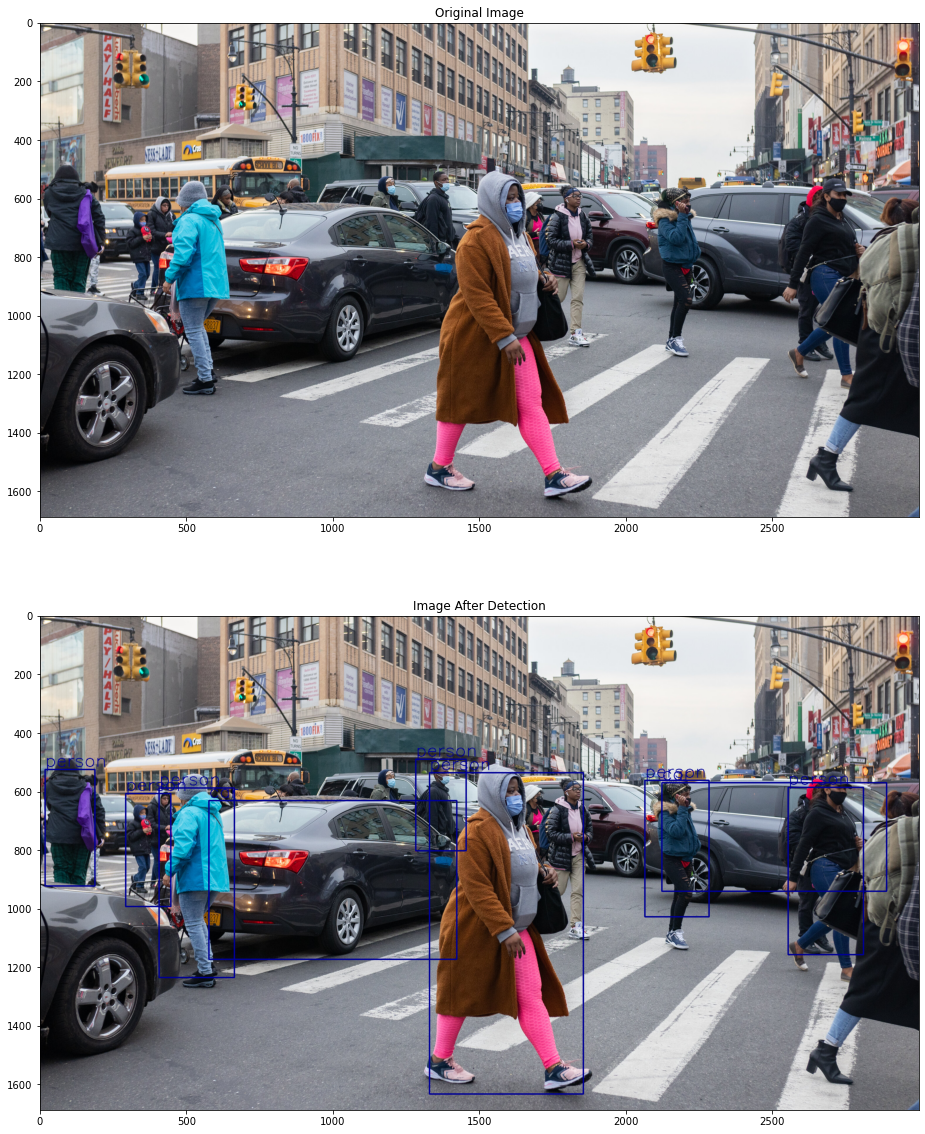

In [59]:
# feel free to choose any image you want
# printing the original image
img = os.path.join('Resources', 'Street.jpg')
img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
plt.title('Original Image')
plt.imshow(img);
# displaying the same image after detections
detect_one_img(img)
plt.subplot(2, 1, 2)
plt.title('Image After Detection')
plt.imshow(img);

### Why don't we try it on a video? after all a video is nothing but a series of images

In [50]:
vid_path = os.path.join('Resources', 'Street.mp4')
vid_capture = cv2.VideoCapture(vid_path)
if (vid_capture.isOpened() == False):
    print("Error opening the video file")
else:
    while(vid_capture.isOpened()):
        ret, frame = vid_capture.read()
        if ret == True:
            detect_one_img(frame)
            cv2.imshow('Frame',frame)
            # 1 is in milliseconds, try to increase the value, say 5 and observe
            key = cv2.waitKey(1)
            # press q to quit
            if key == ord('q'):
                break
        else:
            break

# Release the video capture object
vid_capture.release()
cv2.destroyAllWindows()

### Now let's get to the fun part Realtime Object Detection!

In [52]:
# initialize the camera
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1288)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
while True:
    # getting frames
    ret, frame = cap.read()    
    # object detection
    detect_one_img(frame)
    cv2.imshow("Frame" ,frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

##### also huge thanks to pysource.com & learnopencv.com for making it possible for me to learn these concepts and create that project.